# Stratification
This notebook deals with different implementaion of stratification.

## 1. Implementation of Stratification based on Medium Blogpost by Anil Ozturk
* https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079

In [114]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import pandas as pd

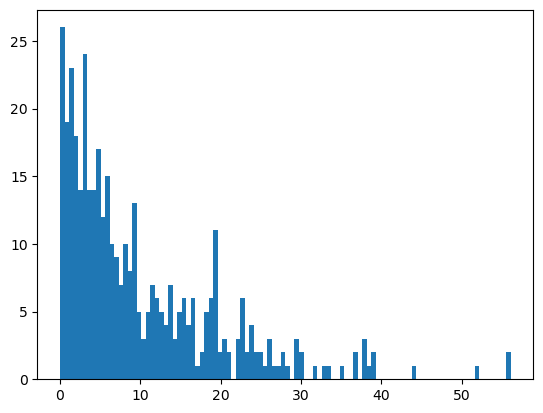

In [115]:
# generate random target values of regression problem: floats between 0 and 100
y = np.random.exponential(scale=10, size=400)

# Convert NumPy array to Pandas DataFrame as in later application, y is most likely a data frame
#y = pd.DataFrame({'Target': y})

# plot histogram of target values
plt.hist(y, bins=100)
plt.show()

In [116]:
''' original funciton
def create_cont_folds(df, n_s=8, n_grp=1000, seed=1):
    # StratifiedKFold for classification
    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)
    #pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise'
    # q = Number of quantiles
    grp = pd.qcut(x = df, q = n_grp, labels=False)
    target = grp
    
    fold_nums = np.zeros(len(df))
    for fold_no, (t, v) in enumerate(skf.split(target, target)):
        fold_nums[v] = fold_no
    
    cv_splits = []

    for i in range(num_of_folds):
        test_indices = np.argwhere(fold_nums==i).flatten()
        train_indices = list(set(range(len(labels))) - set(test_indices))
        cv_splits.append((train_indices, test_indices))
        
    return cv_splits
'''

" original funciton\ndef create_cont_folds(df, n_s=8, n_grp=1000, seed=1):\n    # StratifiedKFold for classification\n    skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)\n    #pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise'\n    # q = Number of quantiles\n    grp = pd.qcut(x = df, q = n_grp, labels=False)\n    target = grp\n    \n    fold_nums = np.zeros(len(df))\n    for fold_no, (t, v) in enumerate(skf.split(target, target)):\n        fold_nums[v] = fold_no\n    \n    cv_splits = []\n\n    for i in range(num_of_folds):\n        test_indices = np.argwhere(fold_nums==i).flatten()\n        train_indices = list(set(range(len(labels))) - set(test_indices))\n        cv_splits.append((train_indices, test_indices))\n        \n    return cv_splits\n"

In [117]:
'''
labels= y# labels
n_s=4 # number of folds
n_grp=10 # number of groups
num_of_folds = 10
num_of_groups = 10
seed=1 # set seed


# StratifiedKFold for classification
skf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)
# create groups
grp = pd.qcut(labels, n_grp, labels=False)
target = grp

# create fold numbers    
fold_nums = np.zeros(len(labels))
#split(X, y[, groups]): Generate indices to split data into training and test set.
for fold_no, (t, v) in enumerate(skf.split(target, target)): 
    fold_nums[v] = fold_no
    print(fold_no)
#print("fold_nums", fold_nums)
    
cv_splits = []

# iterate over folds
for i in range(num_of_folds):
    test_indices = np.argwhere(fold_nums==i).flatten()
    train_indices = list(set(range(len(labels))) - set(test_indices))
    cv_splits.append((train_indices, test_indices))
        
#cv_splits
'''

'\nlabels= y# labels\nn_s=4 # number of folds\nn_grp=10 # number of groups\nnum_of_folds = 10\nnum_of_groups = 10\nseed=1 # set seed\n\n\n# StratifiedKFold for classification\nskf = StratifiedKFold(n_splits=n_s, shuffle=True, random_state=seed)\n# create groups\ngrp = pd.qcut(labels, n_grp, labels=False)\ntarget = grp\n\n# create fold numbers    \nfold_nums = np.zeros(len(labels))\n#split(X, y[, groups]): Generate indices to split data into training and test set.\nfor fold_no, (t, v) in enumerate(skf.split(target, target)): \n    fold_nums[v] = fold_no\n    print(fold_no)\n#print("fold_nums", fold_nums)\n    \ncv_splits = []\n\n# iterate over folds\nfor i in range(num_of_folds):\n    test_indices = np.argwhere(fold_nums==i).flatten()\n    train_indices = list(set(range(len(labels))) - set(test_indices))\n    cv_splits.append((train_indices, test_indices))\n        \n#cv_splits\n'

In [118]:
n_folds=4 # number of folds in cross-validation
n_goups=10 # number of groups for quantile-based discretization 
seed=1 # set seed

# create StratifiedKFold like for classification
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

# create groups in y with pd.qcut: quantile-based discretization 
y_grouped = pd.qcut(y, n_goups, labels=False)

# create fold numbers    
fold_nums = np.zeros(len(y))
#split(X, y[, groups]): Generate indices to split data into training and test set
for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
    fold_nums[v] = fold_no
    #print(fold_no)

cv_splits = []

# iterate over folds
for i in range(n_folds):
    test_indices = np.argwhere(fold_nums==i).flatten()
    train_indices = list(set(range(len(y_grouped))) - set(test_indices))
    cv_splits.append((train_indices, test_indices))

Some checks:

In [119]:
# Iterate over the splits and print the sizes of the training and testing sets
for train_index, test_index in skf.split(y_grouped, y_grouped):
    print(f"Train set: {len(train_index)} samples, Test set: {len(test_index)} samples")

#train_index

Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples
Train set: 300 samples, Test set: 100 samples


400
[0 1 2 3 4 5 6 7 8 9]
0: 40
1: 40
2: 40
3: 40
4: 40
5: 40
6: 40
7: 40
8: 40
9: 40


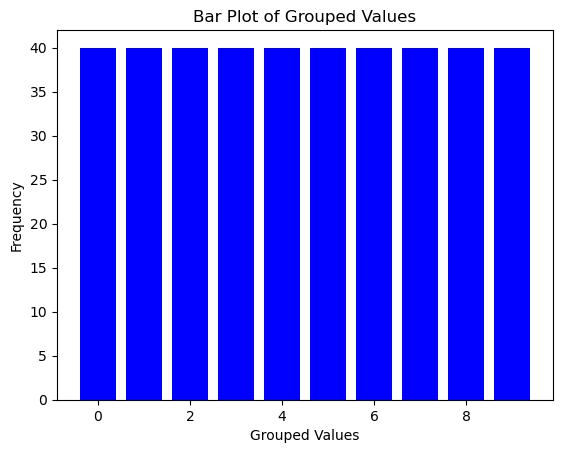

In [120]:
print(len(y_grouped))
print(np.sort(np.unique(y_grouped)))

# Assuming grp is a NumPy array
unique_values, counts = np.unique(y_grouped, return_counts=True)

# Print the counts of unique values
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")


# Create a bar plot
plt.bar(unique_values, counts, color='blue')

# Add labels and title
plt.xlabel('Grouped Values')
plt.ylabel('Frequency')
plt.title('Bar Plot of Grouped Values')

# Show the plot
plt.show()



400
[0. 1. 2. 3.]
0.0: 100
1.0: 100
2.0: 100
3.0: 100


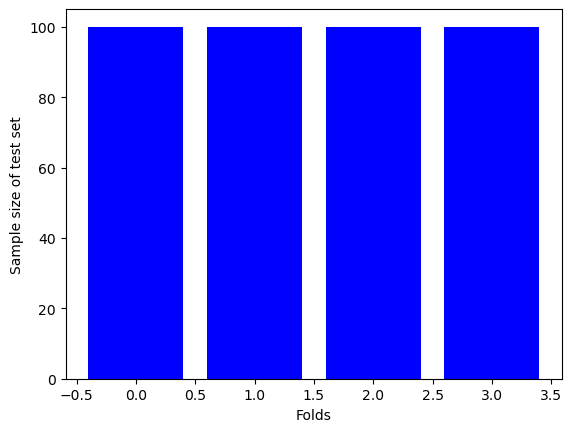

In [121]:
print(len(fold_nums))
print(np.sort(np.unique(fold_nums)))

# Assuming grp is a NumPy array
unique_values, counts = np.unique(fold_nums, return_counts=True)

# Print the counts of unique values
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

# Create a bar plot
plt.bar(unique_values, counts, color='blue')

# Add labels and title
plt.xlabel('Folds')
plt.ylabel('Sample size of test set')

# Show the plot
plt.show()


400
400


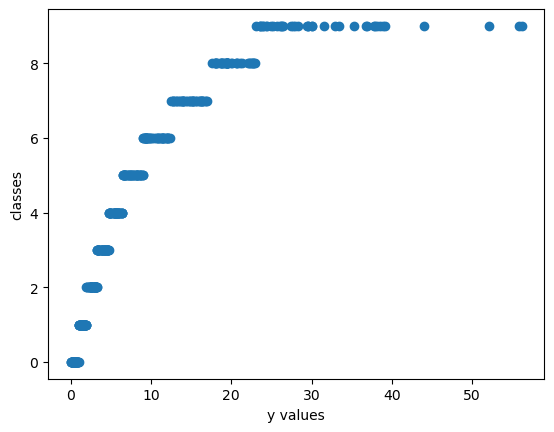

In [122]:
print(len(y))
print(len(y_grouped))

# plot y and grop
plt.plot(y, y_grouped, 'o')
plt.xlabel('y values')
plt.ylabel('classes')
plt.show()

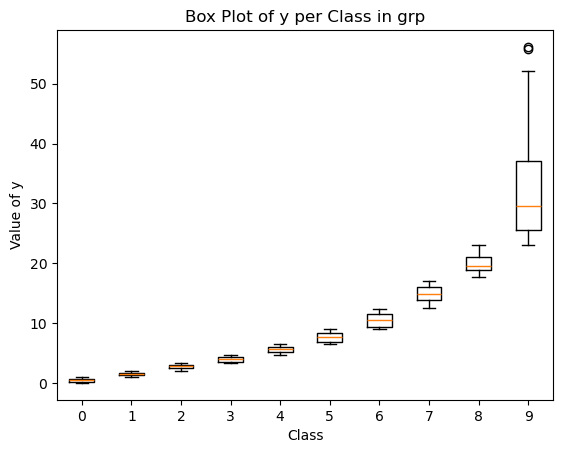

In [123]:
# Create a list to store the values of 'y' for each class in 'grp'
data_by_class = [y[y_grouped == i] for i in np.unique(y_grouped)]

# Create a box plot
plt.boxplot(data_by_class, labels=np.unique(y_grouped))

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Value of y')
plt.title('Box Plot of y per Class in grp')

# Show the plot
plt.show()

In [124]:
print(len(cv_splits))
print(len(cv_splits[0]))
print(cv_splits[0][0][:10])
print(cv_splits[1][0][:10])

4
2
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [125]:
def create_cont_folds(y, n_folds=5, n_groups=5, seed=1):
    # create StratifiedKFold like for classification
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)

    # create groups in y with pd.qcut: quantile-based discretization 
    y_grouped = pd.qcut(y, n_groups, labels=False)

    # create fold numbers    
    fold_nums = np.zeros(len(y))
    #split(X, y[, groups]): Generate indices to split data into training and test set
    for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
        fold_nums[v] = fold_no
  

    cv_splits = []

    # iterate over folds and creat train and test indices for each fold
    for i in range(n_folds):
        test_indices = np.argwhere(fold_nums==i).flatten()
        train_indices = list(set(range(len(y_grouped))) - set(test_indices))
        cv_splits.append((train_indices, test_indices))

    return cv_splits

In [126]:
cv_splits_test = create_cont_folds(y, n_folds=4, n_goups=5, seed=1)
print(len(cv_splits_test))

4


In [ ]:
# check that cv splits worked correctly
test_dat=[]
for index, value in enumerate(cv_splits_test):
    test_dat.extend(value[1])
num_unique_numbers = len(set(test_dat))
print(f"Number of unique numbers: {num_unique_numbers}")

## Visualization

In [127]:
from utils_Nadja import fold_visualizer

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

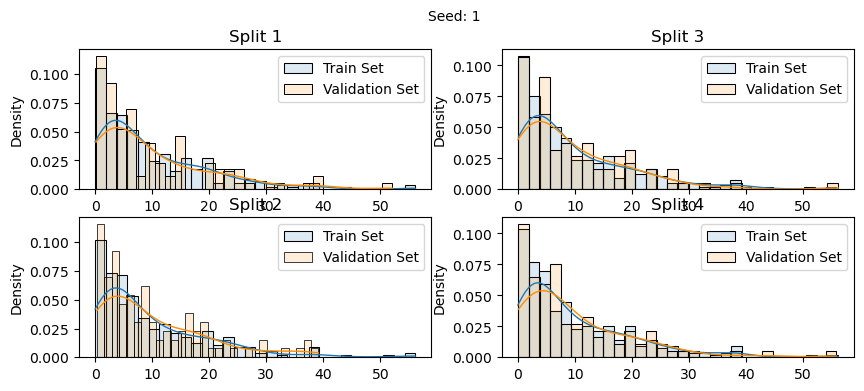

In [128]:
fold_visualizer(data=y,fold_idxs=cv_splits_test,seed_num=1)

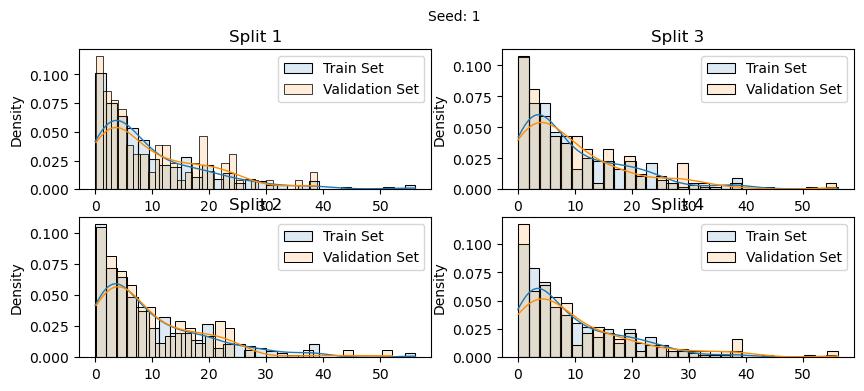

In [129]:
from sklearn.model_selection import KFold
baseline_kfold = list(KFold(4,shuffle=True,random_state=3).split(y))
fold_visualizer(data=y,fold_idxs=baseline_kfold,seed_num=1)

## Only train-test split

In [130]:
def train_test_split_strtified(y, n_goups_binning=5, seed=1, percentage_test=0.2):
    n_splits = int(1/percentage_test) #@Nadja: sollte man denk ich entkoppeln
    print(n_splits)
    # create StratifiedKFold like for classification
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

    # create groups in y with pd.qcut: quantile-based discretization 
    y_grouped = pd.qcut(y, n_goups_binning, labels=False)

    # create fold numbers    
    fold_nums = np.zeros(len(y))
    #split(X, y[, groups]): Generate indices to split data into training and test set
    for fold_no, (t, v) in enumerate(skf.split(y_grouped, y_grouped)): #@Nadja: unabhängig von n_folds? n_folds = fol_no, test_data_size = N/n_folds
        fold_nums[v] = fold_no

    test_indices = np.argwhere(fold_nums==1).flatten()
    train_indices = list(set(range(len(y_grouped))) - set(test_indices))
    y_test = y[test_indices]
    y_train = y[train_indices]

    return y_test, y_train

#@Nadja: achtung mit der ausgabe, du gibst nur y aus... entweder auch x dazu ausgeben oder die indizes, dass du die richtigen X nehmen kannst.

In [131]:
y_test, y_train = train_test_split_strtified(y, n_goups_binning=5, seed=1, percentage_test=0.2)
print(len(y_test))
print(len(y_train))


5
80
320


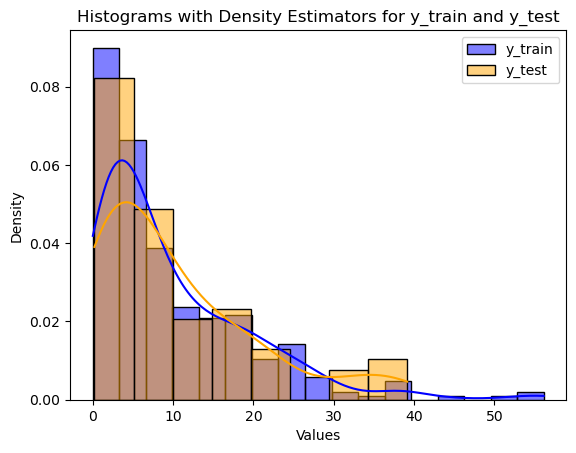

In [132]:
import seaborn as sns
# Create histograms with density estimators
sns.histplot(y_train, kde=True, label='y_train', color='blue', stat="density")
sns.histplot(y_test, kde=True, label='y_test', color='orange',stat="density")

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms with Density Estimators for y_train and y_test')

# Add a legend
plt.legend()

# Show the plot
plt.show()